In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# -- VERSION 1

df1 = pd.read_csv('2018_ML1.csv')
df2 = pd.read_csv('2019_ML1.csv')
df3 = pd.read_csv('2020_ML1.csv')
df4 = pd.read_csv('2021_ML1.csv')
df5 = pd.read_csv('2022_ML1.csv')
df6 = pd.read_csv('2023_ML1.csv')
df7 = pd.read_csv('additional_data_ML1.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7])

df = df.dropna(subset='cite_count')

df = df.drop('title', axis=1)

# -- author_count cleaning and outliers handling

df['author_count'] = df['author_count'].fillna(np.round(df['author_count'].mean()))

q1 = df['author_count'].quantile(0.25)

q3 = df['author_count'].quantile(0.75)

iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df['author_count'] = df['author_count'].apply(lambda x: lower if x < lower else upper if x > upper else x)
# df['author_count'] = df['author_count'].apply(lambda x: np.log1p(x))

# -- unique_affiliations_count outliers handling

q1 = df['unique_affiliations_count'].quantile(0.25)

q3 = df['unique_affiliations_count'].quantile(0.75)

iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df['unique_affiliations_count'] = df['unique_affiliations_count'].apply(lambda x: lower if x < lower else upper if x > upper else x)
# df['unique_affiliations_count'] = df['unique_affiliations_count'].apply(lambda x: np.log1p(x))

# -- open_access cleaning

df['open_access'] = df['open_access'].fillna(np.round(df['open_access'].mean()))

# -- cite_count outliers handling

q1 = df['cite_count'].quantile(0.25)

q3 = df['cite_count'].quantile(0.75)

iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df['cite_count'] = df['cite_count'].apply(lambda x: lower if x < lower else upper if x > upper else x)

# -- train model (Linear Regression and Random Forest Regressor)

x = df.drop('cite_count', axis=1)
y = df.pop('cite_count')
# y = np.log1p(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2024)

linear = LinearRegression()
rf = RandomForestRegressor()

grid = GridSearchCV(
    estimator=rf,
    param_grid={
        'n_estimators': [100],
        'criterion': ['squared_error', 'friedman_mse'],
        "max_depth":[2,3],
        "min_samples_leaf":[2,5],
        'random_state': [2024],
    },
    cv=5,
    n_jobs=-1
)

linear.fit(x_train, y_train)
grid.fit(x_train, y_train)

pred1 = linear.predict(x_test)
pred2 = grid.predict(x_test)

coef_linear = pd.DataFrame(linear.coef_, linear.feature_names_in_, columns=["Coefficient"])
coef_rf = pd.DataFrame(grid.best_estimator_.feature_importances_, grid.feature_names_in_, columns=["Coefficient"])

mse_l = metrics.mean_squared_error(y_test, pred1)
r2_l = metrics.r2_score(y_test, pred1)

mse_rf = metrics.mean_squared_error(y_test, pred2)
r2_rf = metrics.r2_score(y_test, pred2)
print("Linear Regression")
print(f'MSE: {mse_l}')
print(f'R2: {r2_l}')

print("Random Forest Regressor")
print(f'MSE: {mse_rf}')
print(f'R2: {r2_rf}')

# plt.scatter(y_test, pred1, label='LinearReg')

# plt.scatter(y_test, pred2, label='RFReg')
# plt.legend()

print(coef_linear)
print(coef_rf)
print(grid.best_params_)



Linear Regression
MSE: 65.51430470501889
R2: 0.04585109579699054
Random Forest Regressor
MSE: 64.95101327853772
R2: 0.05405485984125413
                           Coefficient
author_count                  0.268364
open_access                  -0.218712
unique_affiliations_count     0.560882
                           Coefficient
author_count                  0.349023
open_access                   0.028486
unique_affiliations_count     0.622492
{'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 100, 'random_state': 2024}


In [6]:
# -- VERSION 2,3

df = pd.read_csv('2018_ML_V3.csv')

df = df.drop('title', axis=1)

df['open_access'] = df['open_access'].fillna(np.round(df['open_access'].mean()))

df['ref_count'] = df['ref_count'].fillna(np.round(df['ref_count'].mean()))

q1 = df['ref_count'].quantile(0.25)
q3 = df['ref_count'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df['ref_count'] = df['ref_count'].apply(lambda x: lower if x < lower else upper if x > upper else x)

q1 = df['author_count'].quantile(0.25)
q3 = df['author_count'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df['author_count'] = df['author_count'].apply(lambda x: lower if x < lower else upper if x > upper else x)

q1 = df['unique_affiliations_count'].quantile(0.25)
q3 = df['unique_affiliations_count'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df['unique_affiliations_count'] = df['unique_affiliations_count'].apply(lambda x: lower if x < lower else upper if x > upper else x)

dummy = pd.get_dummies(df['subtype'], drop_first=True)
df = pd.concat([df,dummy], axis=1)
df = df.drop('subtype',axis=1)

x = df.drop('cite_count', axis=1)
y = df.pop('cite_count')
# y = np.log1p(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2024)

linear = LinearRegression()
rf = RandomForestRegressor()

grid = GridSearchCV(
    estimator=rf,
    param_grid={
        'n_estimators': [100],
        'criterion': ['squared_error', 'friedman_mse'],
        "max_depth":[2,3],
        "min_samples_leaf":[2,5],
        'random_state': [2024],
    },
    cv=5,
    n_jobs=-1
)

linear.fit(x_train, y_train)
grid.fit(x_train, y_train)

pred1 = linear.predict(x_test)
pred2 = grid.predict(x_test)

coef_linear = pd.DataFrame(linear.coef_, linear.feature_names_in_, columns=["Coefficient"])
coef_rf = pd.DataFrame(grid.best_estimator_.feature_importances_, grid.feature_names_in_, columns=["Coefficient"])

mse_l = metrics.mean_squared_error(y_test, pred1)
r2_l = metrics.r2_score(y_test, pred1)

mse_rf = metrics.mean_squared_error(y_test, pred2)
r2_rf = metrics.r2_score(y_test, pred2)
print("Linear Regression")
print(f'MSE: {mse_l}')
print(f'R2: {r2_l}')

print("Random Forest Regressor")
print(f'MSE: {mse_rf}')
print(f'R2: {r2_rf}')

Linear Regression
MSE: 675.1087281787604
R2: 0.21687866340590867
Random Forest Regressor
MSE: 699.2764541698689
R2: 0.1888442726616889


              precision    recall  f1-score   support

           0       0.73      0.84      0.78       465
           1       0.76      0.61      0.68       373

    accuracy                           0.74       838
   macro avg       0.74      0.73      0.73       838
weighted avg       0.74      0.74      0.74       838



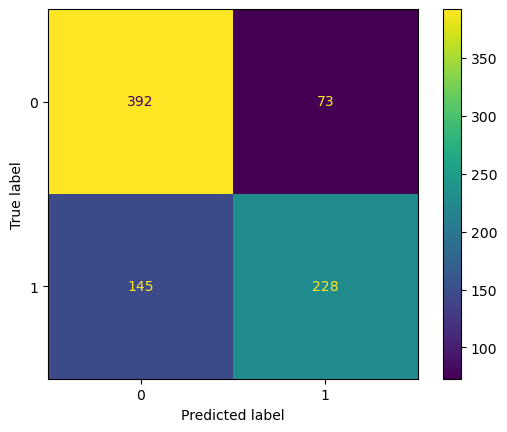

In [34]:
# -- Version 4 reliable sources

df = pd.read_csv('2018_ML_V3.csv')

df['ref_count'] = df['ref_count'].fillna(np.round(df['ref_count'].mean()))
df['open_access'] = df['open_access'].fillna(np.round(df['open_access'].mean()))

df['reliable'] = df['cite_count'].apply(lambda x: 1 if x >= 10 else 0)

df = df.drop('title', axis=1)

dummy = pd.get_dummies(df['subtype'], drop_first=True)
df = pd.concat([df, dummy], axis=1)
df = df.drop('subtype', axis=1)

x = df.drop(['reliable', 'cite_count'], axis=1)
y = df['reliable']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=2024)

grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators': [100],
        "max_depth":[2,3],
        "min_samples_leaf":[2,5],
        'random_state': [2024],
    },
    cv=5,
    n_jobs=-1
)

grid.fit(x_train, y_train)
pred = grid.predict(x_test)

print(metrics.classification_report(y_test, pred))

display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, pred))
display.plot()
# print(df['ref_count'].value_counts())
# print(df[df['ref_count'] > 30]['ref_count'].count()/df.shape[0])